In [1]:
!pip install binance_historical_data mplfinance darts stable-baselines3


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from binance_historical_data import BinanceDataDumper

data_dumper = BinanceDataDumper(
    path_dir_where_to_dump=".",
    asset_class="spot",  # spot, um, cm
    data_type="klines",  # aggTrades, klines, trades
    data_frequency="1m",
)

print(data_dumper.get_list_all_trading_pairs())

data_dumper.dump_data(tickers=["NEARUSDT"])

['ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'QTUMETH', 'EOSETH', 'SNTETH', 'BNTETH', 'BCCBTC', 'GASBTC', 'BNBETH', 'BTCUSDT', 'ETHUSDT', 'HSRBTC', 'OAXETH', 'DNTETH', 'MCOETH', 'ICNETH', 'MCOBTC', 'WTCBTC', 'WTCETH', 'LRCBTC', 'LRCETH', 'QTUMBTC', 'YOYOBTC', 'OMGBTC', 'OMGETH', 'ZRXBTC', 'ZRXETH', 'STRATBTC', 'STRATETH', 'SNGLSBTC', 'SNGLSETH', 'BQXBTC', 'BQXETH', 'KNCBTC', 'KNCETH', 'FUNBTC', 'FUNETH', 'SNMBTC', 'SNMETH', 'NEOETH', 'IOTABTC', 'IOTAETH', 'LINKBTC', 'LINKETH', 'XVGBTC', 'XVGETH', 'SALTBTC', 'SALTETH', 'MDABTC', 'MDAETH', 'MTLBTC', 'MTLETH', 'SUBBTC', 'SUBETH', 'EOSBTC', 'SNTBTC', 'ETCETH', 'ETCBTC', 'MTHBTC', 'MTHETH', 'ENGBTC', 'ENGETH', 'DNTBTC', 'ZECBTC', 'ZECETH', 'BNTBTC', 'ASTBTC', 'ASTETH', 'DASHBTC', 'DASHETH', 'OAXBTC', 'ICNBTC', 'BTGBTC', 'BTGETH', 'EVXBTC', 'EVXETH', 'REQBTC', 'REQETH', 'VIBBTC', 'VIBETH', 'HSRETH', 'TRXBTC', 'TRXETH', 'POWRBTC', 'POWRETH', 'ARKBTC', 'ARKETH', 'YOYOETH', 'XRPBTC', 'XRPETH', 'MODBTC', 'MODETH', 'ENJBTC', 'ENJETH', 'STORJBTC', 'ST

Tickers:   0%|          | 0/1 [00:00<?, ?it/s]

monthly files to download:   0%|          | 0/1 [00:00<?, ?files/s]

daily files to download:   0%|          | 0/1 [00:00<?, ?files/s]

Tried to dump data for 1 tickers:
---> For NEARUSDT new data saved for: 0 months 1 days


In [3]:
import pandas as pd
import numpy as np
import os

filenames = next(os.walk("./spot/monthly/klines/NEARUSDT/1m"), (None, None, []))[2]  # [] if no file

columns = [
    "Open time",
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Close time",
    "Quote asset volume",
    "Number of trades",
    "Taker buy base asset volume",
    "Taker buy quote asset volume",
    "Ignore"
]

df = pd.DataFrame(columns=columns)

for f in filenames:
    new_df = pd.read_csv(f"./spot/monthly/klines/NEARUSDT/1m/{f}", header=None, names=columns)
    df = pd.concat([df, new_df])
df = df.sort_values(by="Open time")
df

/tmp/ipykernel_32455/777231159.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df])


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1602651600000,1.3000,1.8800,1.3000,1.3760,1429560.44,1602651659999,2.313165e+06,1848,520043.50,837306.088337,0
1,1602651660000,1.3759,1.4000,1.1111,1.2493,987505.68,1602651719999,1.205528e+06,1392,614158.78,747451.518743,0
2,1602651720000,1.2489,1.3593,1.1660,1.2552,549711.33,1602651779999,6.942747e+05,1103,277203.12,349648.438905,0
3,1602651780000,1.2499,1.2500,1.1359,1.1742,343258.80,1602651839999,4.081314e+05,773,170461.39,202748.271257,0
4,1602651840000,1.1754,1.2752,1.1753,1.2300,243382.88,1602651899999,2.965310e+05,440,170472.03,207510.362489,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44635,1690847700000,1.3710,1.3710,1.3690,1.3690,5932.20,1690847759999,8.131457e+03,23,0.00,0.000000,0
44636,1690847760000,1.3690,1.3690,1.3690,1.3690,81.30,1690847819999,1.112997e+02,3,81.30,111.299700,0
44637,1690847820000,1.3690,1.3700,1.3690,1.3690,1278.00,1690847879999,1.749664e+03,10,438.10,599.840400,0
44638,1690847880000,1.3690,1.3700,1.3690,1.3700,468.60,1690847939999,6.415331e+02,6,468.60,641.533100,0


In [4]:
OHLC_COLUMNS = [
    "Open",
    "High",
    "Low",
    "Close"]
dataset = df.loc[:, OHLC_COLUMNS].astype(np.float64)
dataset = pd.DataFrame(dataset.to_numpy(), columns=OHLC_COLUMNS)


def add_features(df):
    df = df.copy()
    # add technical indicators to dataset
    df['SMA_256'] = df['Close'].rolling(window=256).mean()
    df['SMA_512'] = df['Close'].rolling(window=512).mean()
    df['SMA_1024'] = df['Close'].rolling(window=1024).mean()

    # convert SMA columns to distance in percentages from "Close"
    df['SMA_256'] = ((df['Close'] - df['SMA_256']) / df['SMA_256'])
    df['SMA_512'] = ((df['Close'] - df['SMA_512']) / df['SMA_512'])
    df['SMA_1024'] = ((df['Close'] - df['SMA_1024']) / df['SMA_1024'])

    # drop NaN rows resulting from the SMA calculations
    df = df.dropna()
    return df


dataset = add_features(dataset)
dataset

,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
1023,1.1284,1.1293,1.1284,1.1293,0.027575,-0.002864,-0.033380
1024,1.1284,1.1309,1.1284,1.1309,0.029032,-0.001275,-0.031812
1025,1.1310,1.1361,1.1310,1.1361,0.033741,0.003445,-0.027268
1026,1.1362,1.1364,1.1337,1.1364,0.033990,0.003865,-0.026914
1027,1.1375,1.1382,1.1356,1.1376,0.035056,0.005082,-0.025857
...,...,...,...,...,...,...,...
1468511,1.3710,1.3710,1.3690,1.3690,0.002847,-0.001843,-0.010031
1468512,1.3690,1.3690,1.3690,1.3690,0.002859,-0.001824,-0.010010
1468513,1.3690,1.3700,1.3690,1.3690,0.002873,-0.001804,-0.009989
1468514,1.3690,1.3700,1.3690,1.3700,0.003617,-0.001057,-0.009247


In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


class MultiScaler:
    def __init__(self, min_max: MinMaxScaler, std: StandardScaler):
        self.min_max = min_max
        self.std = std


def preprocess(df, scaler=None):
    # Apply percentage change only to OHLC columns
    df_pct = df[OHLC_COLUMNS].pct_change()

    # clamp
    df_pct[df_pct > 0.1] = 0.1
    df_pct[df_pct < -0.1] = -0.1

    # Concatenate the percentage-changed OHLC with the other columns
    df_all = pd.concat([df_pct, df.drop(columns=OHLC_COLUMNS)], axis=1)

    # Drop NA values (from pct_change operation)
    df_all = df_all.dropna()

    # Apply MinMax scaling to all columns
    if scaler is None:
        scaler = MultiScaler(MinMaxScaler(feature_range=(-1, 1)), StandardScaler())
        df_multi_scaled = scaler.min_max.fit_transform(scaler.std.fit_transform(df_all))
    else:
        df_multi_scaled = scaler.min_max.transform(scaler.std.transform(df_all))

    df_scaled = pd.DataFrame(df_multi_scaled,
                             columns=df_all.columns,
                             index=df_all.index)

    return df_scaled, scaler


def invert_preprocess(original_start, scaler: MultiScaler, df):
    original_start = original_start[OHLC_COLUMNS].to_numpy()
    # Invert MinMax scaling for all columns
    df_inv_scaled = pd.DataFrame(scaler.std.inverse_transform(scaler.min_max.inverse_transform(df)),
                                 columns=df.columns,
                                 index=df.index)

    # Recover the original OHLC values
    reversed_array = np.cumprod(1 + df_inv_scaled[OHLC_COLUMNS].to_numpy(), axis=0)
    reversed_array = reversed_array * original_start  # Scaling by the original_start to each element

    df_inv_scaled[OHLC_COLUMNS] = reversed_array

    return df_inv_scaled


preprocessed_dataset, scaler = preprocess(dataset)

# transform dataset so that all transform-invert transform pairs are idempotent
dataset = invert_preprocess(dataset.iloc[0], scaler, preprocessed_dataset)
dataset = add_features(dataset)

preprocessed_dataset

,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
1024,1.243783e-16,1.416807e-02,2.991144e-16,-0.003740,-0.246520,-0.283731,-0.298767
1025,2.304147e-02,4.598108e-02,2.304147e-02,0.028651,-0.238204,-0.275479,-0.291010
1026,4.597701e-02,2.640613e-03,2.387268e-02,-0.015477,-0.237763,-0.274744,-0.290407
1027,1.144165e-02,1.583949e-02,1.675928e-02,-0.007414,-0.235881,-0.272617,-0.288602
1028,7.032967e-03,5.798629e-02,7.044734e-03,0.046276,-0.224408,-0.261230,-0.277957
...,...,...,...,...,...,...,...
1468511,1.243783e-16,8.124401e-17,-1.458789e-02,-0.033018,-0.292761,-0.284723,-0.261584
1468512,-1.458789e-02,-1.458789e-02,2.991144e-16,-0.018165,-0.292740,-0.284690,-0.261547
1468513,1.243783e-16,7.304602e-03,2.991144e-16,-0.018165,-0.292715,-0.284656,-0.261513
1468514,1.243783e-16,8.124401e-17,2.991144e-16,-0.010728,-0.291401,-0.283349,-0.260245


In [40]:
from sklearn.metrics import mean_absolute_error


def test_preprocess_invert_preprocess(original_df):
    original_df = original_df
    preprocessed_df, scaler = preprocess(original_df)

    # Assume that 'original_start' is the first row of the original DataFrame
    original_start = original_df.iloc[0]

    inverted_df = invert_preprocess(original_start, scaler, preprocessed_df)

    mae_list = []
    for col in original_df.columns:
        # Start from the second row of the original_df for comparison
        mae = mean_absolute_error(original_df.iloc[1:][col], inverted_df[col])
        mae_list.append(mae)
        print(f"Mean Absolute Error for {col}: {mae}")

    avg_mae = sum(mae_list) / len(mae_list)
    print(f"Average MAE: {avg_mae}")

    return avg_mae < 1e-9


# Assuming 'dataset' is your original DataFrame
assert test_preprocess_invert_preprocess(dataset)


def test_orig_val():
    # The original_start passed to invert_preprocess() must be the first value in the corresponding
    # original DataFrame segment. For the first range, that's range_orig.iloc[0].
    # For the second range, it's range_orig.iloc[500].

    range_orig = dataset.iloc[1000:2000]
    range_preproc, s = preprocess(range_orig)

    # Inverted for the whole preprocessed range
    range1_inv = invert_preprocess(range_orig.iloc[0], s, range_preproc)

    # Inverted for the latter part of the preprocessed range
    range2_inv = invert_preprocess(range_orig.iloc[500], s, range_preproc.iloc[500:])

    # Due to floating point errors, equality may not be exact. So you might use pd.testing.assert_frame_equal
    # with the check_exact=False parameter
    pd.testing.assert_frame_equal(range1_inv.iloc[500:].reset_index(drop=True),
                                  range2_inv.reset_index(drop=True), check_exact=False)


test_orig_val()

Mean Absolute Error for Open: 3.542045167986639e-13
Mean Absolute Error for High: 8.662094479112055e-13
Mean Absolute Error for Low: 8.57909140967899e-13
Mean Absolute Error for Close: 5.397569701383252e-13
Mean Absolute Error for SMA_256: 8.735925372994355e-19
Mean Absolute Error for SMA_512: 1.3244273082872025e-18
Mean Absolute Error for SMA_1024: 1.802668530215252e-18
Average MAE: 3.7401201092920986e-13
3047
Open        0.878900
High        0.879800
Low         0.878700
Close       0.879100
SMA_256    -0.040076
SMA_512    -0.044329
SMA_1024   -0.117858
Name: 3547, dtype: float64


,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
3048,0.9552,0.9561,0.9549,0.9552,-0.048726,-0.106639,-0.137647
3049,0.9540,0.9540,0.9461,0.9481,-0.055158,-0.112989,-0.143883
3050,0.9487,0.9487,0.9429,0.9429,-0.059684,-0.117556,-0.148402
3051,0.9463,0.9464,0.9432,0.9458,-0.056144,-0.114543,-0.145608
3052,0.9457,0.9457,0.9428,0.9428,-0.058480,-0.117042,-0.148140
...,...,...,...,...,...,...,...
4042,0.7770,0.7770,0.7756,0.7757,-0.060198,-0.092804,-0.127320
4043,0.7756,0.7756,0.7723,0.7724,-0.063852,-0.096453,-0.130849
4044,0.7714,0.7714,0.7639,0.7639,-0.073799,-0.106163,-0.140226
4045,0.7644,0.7644,0.7593,0.7624,-0.075271,-0.107679,-0.141724


<Axes: xlabel='time'>

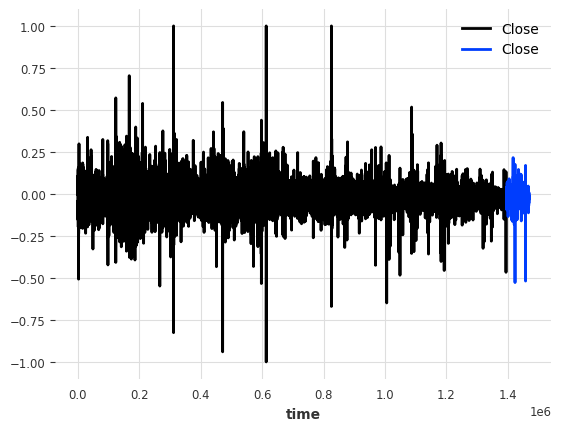

In [7]:
import numpy as np
import pandas as pd

from darts import TimeSeries

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

target_series = TimeSeries.from_dataframe(preprocessed_dataset)
target_train, target_val = target_series.split_after(0.95)

target_train["Close"].plot()
target_val["Close"].plot()

In [8]:
from darts.models import TFTModel

SEQUENCE_LENGTH = 128
PREDICTION_LENGTH = 32
# my_model = RNNModel(
#     model="LSTM",
#     hidden_dim=64,
#     n_rnn_layers=4,
#     dropout=0.1,
#     batch_size=4096,
#     n_epochs=10,
#     # optimizer_kwargs={"lr": 1e-3},
#     # random_state=0,
#     training_length=SEQUENCE_LENGTH,
#     input_chunk_length=SEQUENCE_LENGTH,
#     # likelihood=GaussianLikelihood(),
# )

# my_model = TFTModel(
#     input_chunk_length=SEQUENCE_LENGTH,
#     output_chunk_length=PREDICTION_LENGTH,
#     hidden_size=128,
#     lstm_layers=2,
#     num_attention_heads=4,
#     dropout=0.1,
#     batch_size=512,
#     n_epochs=1,
#     add_relative_index=True,
#     add_encoders=None,
#     random_state=42,
# )

my_model = TFTModel.load("model-weights-1694092035.1712623.pt")
# my_model = RNNModel.load("model-weights-1694033110.215867.pt")

# my_model.fit(target_train, val_series=target_val, verbose=True)

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')
# 
# import time
# import os
# try:
#   os.makedirs("./drive/MyDrive/colab/model-weights/")
# except:
#   pass
# my_model.save(f"./drive/MyDrive/colab/model-weights/model-weights-{time.time()}.pt")

In [11]:
from darts.metrics import mse


def backtest(testing_model, series):
    # Compute the backtest predictions with the two models
    pred_err = testing_model.backtest(
        series=series,
        forecast_horizon=PREDICTION_LENGTH,
        stride=10,
        retrain=False,
        verbose=False,
        metric=mse
    )
    print("MSE:", pred_err)


backtest(my_model, target_val)

MAPE: 0.0003556187458719287


Predicting: 0it [00:00, ?it/s]

component,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
time,,,,,,,
1466389,1.243783e-16,8.124401e-17,2.991144e-16,-0.018165,-0.286180,-0.267065,-0.231091
1466390,1.243783e-16,8.124401e-17,2.991144e-16,-0.018165,-0.286274,-0.267087,-0.231103
1466391,1.243783e-16,8.124401e-17,2.991144e-16,-0.018165,-0.286367,-0.267109,-0.231116
1466392,1.243783e-16,8.124401e-17,-7.057163e-03,-0.025351,-0.287706,-0.268372,-0.232341
1466393,-1.411433e-02,-1.411433e-02,-7.062147e-03,-0.025356,-0.289039,-0.269633,-0.233565
...,...,...,...,...,...,...,...
1466512,1.243783e-16,8.124401e-17,2.991144e-16,-0.018165,-0.306890,-0.283760,-0.247075
1466513,-7.117438e-03,-7.117438e-03,2.991144e-16,-0.018165,-0.306856,-0.283755,-0.247074
1466514,-7.122507e-03,7.122507e-03,-7.122507e-03,-0.018165,-0.306822,-0.283753,-0.247074


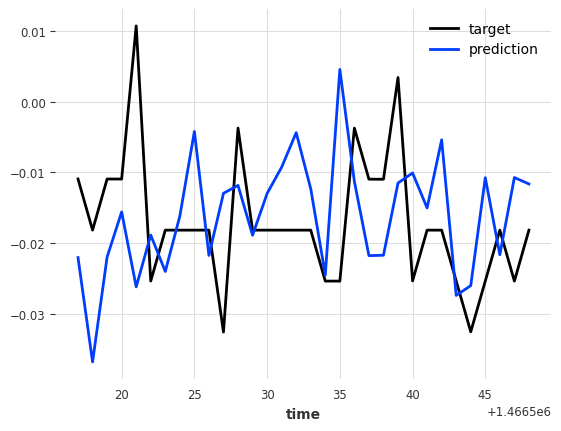

In [116]:
OFFSET_BACK = 1999
predict_X = target_series[-SEQUENCE_LENGTH - OFFSET_BACK:-OFFSET_BACK]
assert len(predict_X) == SEQUENCE_LENGTH
pred: TimeSeries = my_model.predict(PREDICTION_LENGTH, predict_X)

target_val["Close"].slice_intersect(pred["Close"]).plot(label="target")
pred["Close"].plot(label="prediction")
predict_X.pd_dataframe()

In [117]:
original_start_pred = dataset.loc[predict_X[-1].time_index.start]
inverted_pred = invert_preprocess(original_start_pred, scaler, pred.pd_dataframe())
inverted_pred

component,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
time,,,,,,,
1466517,0.840376,0.795193,0.998954,0.833140,-0.001142,0.004912,-0.002730
1466518,0.840044,0.795129,0.999003,0.831614,-0.001304,-0.036807,-0.000578
1466519,0.839648,0.795081,0.999036,0.831303,-0.000385,-0.009150,-0.001917
1466520,0.839929,0.793326,0.998921,0.831513,0.000164,-0.000916,-0.005658
1466521,0.840276,0.793040,1.000401,0.830857,-0.000686,0.006407,0.001064
1466522,0.840174,0.791590,1.000137,0.830800,-0.000539,0.006533,0.001159
1466523,0.838606,0.791275,0.999828,0.830323,-0.000378,-0.001149,-0.001367
1466524,0.838729,0.789922,1.001445,0.830485,-0.007949,0.006275,-0.000547
1466525,0.839001,0.790224,1.001478,0.831624,-0.003761,0.001864,-0.001439


In [118]:
PLOT_BEFORE_PREDICTION = int(PREDICTION_LENGTH / 2)
start_idx = predict_X[-1].time_index.start
original_start_tg = dataset.loc[start_idx - PLOT_BEFORE_PREDICTION]
index = target_series.time_index.intersection(pred.time_index)
index = index.union(index - PLOT_BEFORE_PREDICTION)
inverted_target = invert_preprocess(original_start_tg, scaler, target_series[index].pd_dataframe())
inverted_target

component,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
time,,,,,,,
1466501,0.842515,0.796136,0.999064,0.834644,-0.002590,0.001542,0.001309
1466502,0.842515,0.796136,0.999774,0.834644,-0.002573,0.001539,0.001308
1466503,0.841917,0.795571,0.998354,0.833458,-0.003957,0.000115,-0.000115
1466504,0.841318,0.795005,0.998354,0.833458,-0.003927,0.000115,-0.000116
1466505,0.840720,0.795005,0.997644,0.833458,-0.003910,0.000115,-0.000117
1466506,0.840720,0.795005,0.996933,0.832865,-0.004594,-0.000595,-0.000828
1466507,0.840122,0.793874,0.996933,0.832273,-0.005272,-0.001303,-0.001538
1466508,0.840122,0.795005,0.996933,0.832865,-0.004544,-0.000590,-0.000826
1466509,0.840720,0.794440,0.996223,0.831680,-0.005934,-0.002009,-0.002247


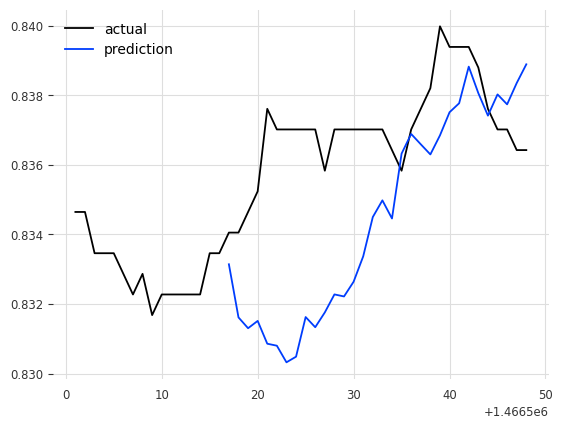

In [119]:

import matplotlib.pyplot as plt

# Create a DataFrame from the 'candlesticks' array
candlesticks_df = pd.DataFrame(inverted_target, columns=OHLC_COLUMNS)
candlesticks_pred_df = pd.DataFrame(inverted_pred, columns=OHLC_COLUMNS)

plt.plot(candlesticks_df["Close"], label="actual")
plt.plot(candlesticks_pred_df["Close"], label="prediction")
plt.legend()

# Adding a fake date index (mplfinance needs this)
# candlesticks_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_df.shape[0])
# candlesticks_df['Date'] = candlesticks_df['Date'].apply(mdates.date2num)
# candlesticks_pred_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_pred_df.shape[0])
# candlesticks_pred_df['Date'] = candlesticks_pred_df['Date'].apply(mdates.date2num)
# 
# # Reordering columns to fit mplfinance requirements
# candlesticks_df = candlesticks_df[['Date', 'Open', 'High', 'Low', 'Close']]
# candlesticks_pred_df = candlesticks_pred_df[['Date', 'Open', 'High', 'Low', 'Close']]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 10))
# 
# candlestick_ohlc(ax, candlesticks_pred_df.values, width=0.6, colorup='lime', colordown='magenta', alpha=0.5)
# candlestick_ohlc(ax, candlesticks_df.values, width=0.6, colorup='g', colordown='r', alpha=0.5)

plt.show()

In [158]:
import random
import gymnasium as gym
from gymnasium import spaces


class CustomEnv(gym.Env):
    MODEL_INPUT_IN_OBSERVATION = 32
    NUM_FEATURES = MODEL_INPUT_IN_OBSERVATION + 34
    SKIP_STEPS = 1200

    def __init__(self, dataset: pd.DataFrame, my_model, scaler, episode_length=4096):
        super().__init__()

        # 0: hold; 1: buy; 2: sell
        self.action_space = spaces.Discrete(3)

        # Update the observation space to include extra information
        self.observation_space = spaces.Box(low=-1, high=1,
                                            shape=(self.NUM_FEATURES,),
                                            dtype=np.float32)

        self.dataset = dataset
        self.my_model = my_model
        self.scaler = scaler
        self.episode_length = episode_length
        self.current_step = 0
        self.start_index = 0
        self.buy_price = None

    def step(self, action):
        self.current_step += 1

        # Calculate the current observation
        observation = self.calculate_observation(self.current_step)

        index_start = self.start_index + self.current_step - self.SKIP_STEPS
        index_end = self.start_index + self.current_step
        df = self.dataset.iloc[index_start:index_end].copy()
        original_start = df.iloc[-1]

        curr_close = original_start.Close

        # Initialize reward and info
        reward = 0
        info = {}

        if self.buy_price is None:
            if action == 1:
                self.buy_price = curr_close
                reward = 0.1
            # punish unavailable actions
            elif action in [0, 2]:
                reward = -0.1
        else:
            gain_from_trade = (curr_close - self.buy_price) / self.buy_price
            if action == 2:
                self.buy_price = None
                reward = gain_from_trade * 100
            # punish unavailable actions
            elif action in [1, ]:
                reward = -0.1

        terminated = self.current_step >= self.episode_length
        return observation, reward, terminated, False, info

    def reset(self, seed=None, options=None):
        self.current_step = 0
        self.buy_price = None
        self.start_index = random.randint(self.SKIP_STEPS, len(self.dataset) - self.episode_length - 1)
        observation = self.calculate_observation(self.current_step)
        info = {}
        return observation, info

    def render(self):
        pass

    def close(self):
        pass

    def calculate_observation(self, current_step):
        index_start = self.start_index + current_step - self.SKIP_STEPS
        index_end = self.start_index + current_step

        df = self.dataset.iloc[index_start:index_end].copy()
        df_with_features = add_features(df)

        original_start = df_with_features.iloc[-1]
        df_preprocessed, _ = preprocess(df_with_features, self.scaler)

        X = TimeSeries.from_dataframe(df_preprocessed[-SEQUENCE_LENGTH:])
        y = self.my_model.predict(PREDICTION_LENGTH, X, verbose=False)

        y_inverted = invert_preprocess(original_start, self.scaler, y.pd_dataframe())
        y_max_close = y_inverted.Close.mean()
        curr_close = original_start.Close

        predicted_gain = (y_max_close - curr_close) / curr_close
        last_32 = df_preprocessed.Close.iloc[-self.MODEL_INPUT_IN_OBSERVATION:].to_numpy().flatten()
        model_output = y.pd_dataframe().Close.to_numpy().flatten()
        buy_status = 1 if self.buy_price is not None else 0
        observation = np.concatenate([last_32, model_output, [predicted_gain], [buy_status]])

        # Assert observation size for safety
        assert observation.shape[0] == self.NUM_FEATURES

        return observation


from stable_baselines3 import A2C

env = CustomEnv(dataset, my_model, scaler)

rl_model = A2C("MlpPolicy", env, verbose=1)
rl_model.learn(total_timesteps=1000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 20       |
|    iterations         | 100      |
|    time_elapsed       | 24       |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.09    |
|    explained_variance | -3.24    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.115   |
|    value_loss         | 0.0437   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 20       |
|    iterations         | 200      |
|    time_elapsed       | 48       |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -1.09    |
|    explained_variance | -5.68    |
|    learning_rate      | 0.0007   |
|    n_updates   

In [163]:
# backtesting

from backtesting import Backtest, Strategy


class NeuralNetStrat(Strategy):
    MODEL_INPUT_IN_OBSERVATION = 32

    def __init__(self, broker, data, params):
        super().__init__(broker, data, params)
        self.buy_price = None
        self.expected_gain = None

    def init(self):
        pass

    def next(self):
        if len(self.data) > 2000:
            df = self.data.df.iloc[-2000:].copy()
            df.drop(columns=["Volume"], inplace=True)
            df_with_features = add_features(df)

            original_start = df_with_features.iloc[-1]

            df_preprocessed, _ = preprocess(df_with_features, scaler)

            X = TimeSeries.from_dataframe(df_preprocessed[-SEQUENCE_LENGTH:])
            y = my_model.predict(PREDICTION_LENGTH, X, verbose=False)

            y_inverted = invert_preprocess(original_start, scaler, y.pd_dataframe())
            y_max_close = y_inverted.Close.mean()
            curr_close = original_start.Close

            predicted_gain = (y_max_close - curr_close) / curr_close
            last_32 = df_preprocessed.Close.iloc[-self.MODEL_INPUT_IN_OBSERVATION:].to_numpy().flatten()
            model_output = y.pd_dataframe().Close.to_numpy().flatten()
            buy_status = 1 if self.buy_price is not None else 0
            observation = np.concatenate([last_32, model_output, [predicted_gain], [buy_status]])

            action, _ = rl_model.predict(observation, deterministic=True)
            if self.buy_price is None:
                if action == 1:
                    self.buy()
            else:
                if action == 2:
                    self.sell()


bt = Backtest(dataset[-5000:], NeuralNetStrat, commission=.001,
              exclusive_orders=True)
stats = bt.run()
stats

Start                               1463516.0
End                                 1468515.0
Duration                               4999.0
Exposure Time [%]                       59.98
Equity Final [$]                   2415.47328
Equity Peak [$]                       10000.0
Return [%]                         -75.845267
Buy & Hold Return [%]               -1.011561
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -76.174232
Avg. Drawdown [%]                  -76.174232
Max. Drawdown Duration                 2999.0
Avg. Drawdown Duration                 2999.0
# Trades                               1397.0
Win Rate [%]                         6.728704
Best Trade [%]                       1.116648
Worst Trade [%]                     -1.454719
Avg. Trade [%]                    